In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(406829, 8)

In [8]:
df["Year"]=df["InvoiceDate"].dt.year
df["Month"]=df["InvoiceDate"].dt.month
df["Day"]=df["InvoiceDate"].dt.day
df["Hour"]=df["InvoiceDate"].dt.hour

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8


# Feature Engineering



In [10]:
df['PurchaseHistory'] = df.groupby('CustomerID')['InvoiceNo'].transform('nunique')
df['OrderFrequency'] =df['PurchaseHistory']/ df.groupby('CustomerID')['InvoiceDate'].transform('nunique')
df['TotalSpending'] = df['Quantity'] * df['UnitPrice']

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,35,1.029412,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,35,1.029412,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,35,1.029412,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,35,1.029412,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,35,1.029412,20.34


In [12]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
Year               0
Month              0
Day                0
Hour               0
PurchaseHistory    0
OrderFrequency     0
TotalSpending      0
dtype: int64

# PCA

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [14]:
features_pca = df.drop([ "InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID"], axis=1)
features_pca.head()

,Quantity,UnitPrice,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending
0,6,2.55,United Kingdom,2010,12,1,8,35,1.029412,15.30
1,6,3.39,United Kingdom,2010,12,1,8,35,1.029412,20.34
2,8,2.75,United Kingdom,2010,12,1,8,35,1.029412,22.00
3,6,3.39,United Kingdom,2010,12,1,8,35,1.029412,20.34
4,6,3.39,United Kingdom,2010,12,1,8,35,1.029412,20.34


In [15]:
features_pca.shape

(406829, 10)

In [16]:
features_pca.dtypes

Quantity             int64
UnitPrice          float64
Country             object
Year                 int32
Month                int32
Day                  int32
Hour                 int32
PurchaseHistory      int64
OrderFrequency     float64
TotalSpending      float64
dtype: object

In [17]:
features_pca['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [18]:
features_pca = pd.get_dummies(features_pca, columns=['Country'], drop_first=True, dtype=int)

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_pca)
scaled_features

array([[-2.43726274e-02, -1.31352523e-02, -3.76190352e+00, ...,
        -1.29295915e-02,  3.52442756e-01, -2.44973573e-02],
       [-2.43726274e-02, -1.01667663e-03, -3.76190352e+00, ...,
        -1.29295915e-02,  3.52442756e-01, -2.44973573e-02],
       [-1.63305857e-02, -1.02498771e-02, -3.76190352e+00, ...,
        -1.29295915e-02,  3.52442756e-01, -2.44973573e-02],
       ...,
       [-3.24146691e-02,  9.94774897e-03,  2.65822873e-01, ...,
        -1.29295915e-02, -2.83734020e+00, -2.44973573e-02],
       [-3.24146691e-02,  9.94774897e-03,  2.65822873e-01, ...,
        -1.29295915e-02, -2.83734020e+00, -2.44973573e-02],
       [-3.64356900e-02,  2.14892496e-02,  2.65822873e-01, ...,
        -1.29295915e-02, -2.83734020e+00, -2.44973573e-02]])

In [20]:
pca = PCA(n_components=10)
pca_features = pca.fit_transform(scaled_features)
pca_features

array([[ 0.32130668,  0.04791347, -1.82702192, ..., -0.19045415,
        -0.24354604, -0.10710022],
       [ 0.31941459,  0.05475696, -1.82679917, ..., -0.18901775,
        -0.24260785, -0.10698624],
       [ 0.31708527,  0.0637468 , -1.8269622 , ..., -0.1898546 ,
        -0.24323616, -0.10702567],
       ...,
       [-3.06572474, -0.87317707,  1.60386936, ...,  3.63642733,
         0.76975222, -0.25747041],
       [-3.06572474, -0.87317707,  1.60386936, ...,  3.63642733,
         0.76975222, -0.25747041],
       [-3.06403245, -0.87982334,  1.60408591, ...,  3.63760495,
         0.77060329, -0.25740537]])

In [21]:
pca.components_

array([[-1.80150846e-01,  1.68584356e-02, -4.38017690e-02,
         5.25856811e-02, -2.45981051e-02,  1.40892397e-01,
        -3.08987286e-01,  5.25496389e-02, -1.81443890e-01,
        -3.29541937e-02, -6.74796133e-03, -9.80587183e-02,
        -9.86174666e-03, -3.25223212e-02, -7.37925670e-02,
        -6.33151999e-02, -1.09302168e-02, -3.89053983e-02,
        -4.03210766e-01, -2.69694364e-02, -6.58757993e-02,
        -2.32706352e-01, -2.57944814e-01, -3.55167239e-02,
        -3.38299076e-02, -3.92784177e-02, -6.59092771e-02,
        -5.03584509e-02, -1.67071912e-02, -1.89674409e-02,
        -2.70569492e-02, -1.67461033e-01, -7.62031064e-02,
        -4.87979043e-02, -8.42067920e-02, -2.24569303e-02,
        -1.91533359e-02, -3.16838830e-02, -1.18337951e-01,
        -5.27728043e-02, -1.15718021e-01, -2.90675740e-02,
        -1.55541668e-02,  6.39917711e-01, -3.85307139e-02],
       [ 6.75791696e-01, -9.89295022e-02, -1.00024254e-02,
         1.35218482e-02, -3.35319777e-03,  3.11536762e-

In [22]:
pca.explained_variance_ratio_

array([0.04460533, 0.04263618, 0.03332873, 0.03160097, 0.02410007,
       0.02256202, 0.02248714, 0.02246079, 0.02232221, 0.02226993])

In [23]:
features_pca = df.drop([ "InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID", "Country"], axis=1)
features_pca.head()

,Quantity,UnitPrice,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending
0,6,2.55,2010,12,1,8,35,1.029412,15.30
1,6,3.39,2010,12,1,8,35,1.029412,20.34
2,8,2.75,2010,12,1,8,35,1.029412,22.00
3,6,3.39,2010,12,1,8,35,1.029412,20.34
4,6,3.39,2010,12,1,8,35,1.029412,20.34


In [24]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_pca)
scaled_features

array([[-2.43726274e-02, -1.31352523e-02, -3.76190352e+00, ...,
         2.58798866e-01,  1.37651033e-01, -1.19316159e-02],
       [-2.43726274e-02, -1.01667663e-03, -3.76190352e+00, ...,
         2.58798866e-01,  1.37651033e-01, -1.44656592e-04],
       [-1.63305857e-02, -1.02498771e-02, -3.76190352e+00, ...,
         2.58798866e-01,  1.37651033e-01,  3.73755621e-03],
       ...,
       [-3.24146691e-02,  9.94774897e-03,  2.65822873e-01, ...,
        -4.22528806e-01, -1.43109263e-01, -8.89132881e-03],
       [-3.24146691e-02,  9.94774897e-03,  2.65822873e-01, ...,
        -4.22528806e-01, -1.43109263e-01, -8.89132881e-03],
       [-3.64356900e-02,  2.14892496e-02,  2.65822873e-01, ...,
        -4.22528806e-01, -1.43109263e-01, -1.29840230e-02]])

In [25]:
pca = PCA(n_components=9)
pca_features = pca.fit_transform(scaled_features)
pca_features



array([[ 1.27758623e-02,  3.67982194e+00, -1.82163126e+00, ...,
         1.10241293e-01, -1.57717878e+00, -3.68982634e-03],
       [ 5.65147781e-03,  3.67983669e+00, -1.82095003e+00, ...,
         1.10818611e-01, -1.57709238e+00, -1.32120130e-02],
       [-3.64324522e-03,  3.67992061e+00, -1.82128174e+00, ...,
         1.10433608e-01, -1.57714612e+00, -9.42188573e-03],
       ...,
       [ 3.41856446e-02,  8.63796259e-01, -3.79374355e-01, ...,
        -2.44112725e-01,  1.15647813e+00, -1.88788747e-02],
       [ 3.41856446e-02,  8.63796259e-01, -3.79374355e-01, ...,
        -2.44112725e-01,  1.15647813e+00, -1.88788747e-02],
       [ 4.10445284e-02,  8.63716929e-01, -3.78883884e-01, ...,
        -2.43583621e-01,  1.15656126e+00, -1.99306039e-02]])

In [26]:
pca.components_

array([[-7.00019991e-01,  9.97085730e-02, -2.66197818e-03,
         5.01666512e-03, -4.20055194e-04,  1.31330301e-02,
        -6.81651448e-03,  3.19420987e-03, -7.06943165e-01],
       [ 3.58985814e-03, -3.79515512e-03, -6.43103227e-01,
         6.34440972e-01, -4.04740681e-01,  1.11678834e-01,
         3.64826228e-02,  7.89359091e-02,  5.15383883e-03],
       [ 1.16561230e-02,  4.91371565e-02,  1.24344613e-01,
         1.44194627e-01,  3.36597491e-01,  5.50460344e-01,
         1.97808324e-01,  7.11133234e-01,  7.27529264e-03],
       [ 4.87431240e-02,  4.00800740e-01, -5.18199213e-03,
        -6.28675185e-03, -2.54575175e-02, -3.79804410e-01,
         8.30416368e-01,  4.88085318e-02, -6.58831645e-03],
       [ 1.30417108e-01,  9.02441570e-01,  2.15765349e-03,
        -1.91086161e-02, -4.72371793e-02,  1.19238336e-01,
        -3.88891551e-01, -2.28014454e-02,  3.88833016e-03],
       [ 7.21988775e-03,  2.43675436e-02,  2.25923695e-02,
        -1.75542679e-01, -1.85386369e-01,  7.244872

In [27]:
pca.explained_variance_ratio_

array([0.21395162, 0.16041034, 0.12210186, 0.11173947, 0.11095465,
       0.10345808, 0.09814407, 0.07090801, 0.0083319 ])

In [28]:
features_pca = df.drop([ "InvoiceNo", "StockCode", "Description", "InvoiceDate", "CustomerID", "Country", "Year", "Month", "Day", "Hour"], axis=1)
features_pca.head()

,Quantity,UnitPrice,PurchaseHistory,OrderFrequency,TotalSpending
0,6,2.55,35,1.029412,15.30
1,6,3.39,35,1.029412,20.34
2,8,2.75,35,1.029412,22.00
3,6,3.39,35,1.029412,20.34
4,6,3.39,35,1.029412,20.34


In [29]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_pca)
scaled_features

array([[-2.43726274e-02, -1.31352523e-02,  2.58798866e-01,
         1.37651033e-01, -1.19316159e-02],
       [-2.43726274e-02, -1.01667663e-03,  2.58798866e-01,
         1.37651033e-01, -1.44656592e-04],
       [-1.63305857e-02, -1.02498771e-02,  2.58798866e-01,
         1.37651033e-01,  3.73755621e-03],
       ...,
       [-3.24146691e-02,  9.94774897e-03, -4.22528806e-01,
        -1.43109263e-01, -8.89132881e-03],
       [-3.24146691e-02,  9.94774897e-03, -4.22528806e-01,
        -1.43109263e-01, -8.89132881e-03],
       [-3.64356900e-02,  2.14892496e-02, -4.22528806e-01,
        -1.43109263e-01, -1.29840230e-02]])

In [30]:
pca = PCA(n_components=5)
pca_features = pca.fit_transform(scaled_features)
pca_features

array([[ 0.02266303,  0.26864898, -0.08823105,  0.07947412, -0.00684414],
       [ 0.01553788,  0.27131573, -0.07659348,  0.08081876, -0.01636631],
       [ 0.00624217,  0.26949497, -0.08433529,  0.07983276, -0.01257623],
       ...,
       [ 0.03261404, -0.3860857 ,  0.11702612, -0.18998694, -0.0179885 ],
       [ 0.03261404, -0.3860857 ,  0.11702612, -0.18998694, -0.0179885 ],
       [ 0.03947368, -0.38364631,  0.12752873, -0.18867967, -0.01904018]])

In [31]:
pca.components_

array([[-7.00088312e-01,  9.97221798e-02, -6.88098670e-03,
         1.85096139e-03, -7.07022679e-01],
       [ 2.71701634e-02,  2.20618148e-01,  6.80331950e-01,
         6.98382071e-01, -5.79427065e-04],
       [ 1.36576547e-01,  9.58300918e-01, -2.39672036e-01,
        -7.45603918e-02,  2.06412586e-03],
       [ 1.30481711e-02,  1.15981551e-01,  6.92573525e-01,
        -7.11823894e-01, -5.16544504e-03],
       [ 7.00224771e-01, -9.79323768e-02,  5.63722840e-04,
         2.55901012e-03, -7.07168759e-01]])

In [32]:
pca.explained_variance_ratio_

array([0.38507904, 0.20614938, 0.19968862, 0.19408523, 0.01499773])

In [33]:
pca.get_feature_names_out()
columns_pca = pca.get_feature_names_out()[:-1]


In [34]:
data_pca = pca_features[:, :-1]
pca_df = pd.DataFrame(data=data_pca, columns=columns_pca)
pca_df.head()

,pca0,pca1,pca2,pca3
0,0.022663,0.268649,-0.088231,0.079474
1,0.015538,0.271316,-0.076593,0.080819
2,0.006242,0.269495,-0.084335,0.079833
3,0.015538,0.271316,-0.076593,0.080819
4,0.015538,0.271316,-0.076593,0.080819


In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

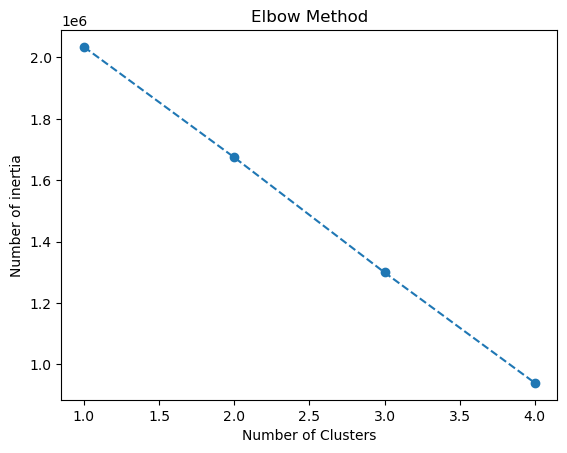

In [36]:
lst_inertias = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    preds = kmeans.fit_predict(pca_features)
    lst_inertias.append(kmeans.inertia_)

plt.plot(range(1, 5), lst_inertias, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Number of inertia')
plt.show()

In [37]:
kmeans = KMeans(n_clusters=2, init='k-means++')
pca_df['Cluster'] = kmeans.fit_predict(pca_features)
pca_df.head()

,pca0,pca1,pca2,pca3,Cluster
0,0.022663,0.268649,-0.088231,0.079474,0
1,0.015538,0.271316,-0.076593,0.080819,0
2,0.006242,0.269495,-0.084335,0.079833,0
3,0.015538,0.271316,-0.076593,0.080819,0
4,0.015538,0.271316,-0.076593,0.080819,0


In [38]:
pca_df['Cluster'].nunique()

2

In [39]:
cluster_summary = pca_df.groupby('Cluster').describe().T
cluster_summary

Cluster                 0           1
pca0 count  406827.000000    2.000000
     mean       -0.002073  421.625275
     std         1.007943  120.228698
     min      -506.502812  336.610748
     25%         0.002164  379.118012
     50%         0.030109  421.625275
     75%         0.053196  464.132539
     max       120.570310  506.639803
pca1 count  406827.000000    2.000000
     mean        0.000043   -8.729216
     std         1.015076    0.423390
     min        -3.776033   -9.028598
     25%        -0.394350   -8.878907
     50%        -0.323836   -8.729216
     75%        -0.138789   -8.579525
     max       123.702852   -8.429835
pca2 count  406827.000000    2.000000
     mean        0.000212  -43.124974
     std         0.994629    2.938013
     min        -5.173413  -45.202464
     25%         0.010349  -44.163719
     50%         0.069955  -43.124974
     75%         0.096750  -42.086230
     max       538.634922  -41.047485
pca3 count  406827.000000    2.000000
     mean        0.000014   -2.805075
     std         0.985086    0.540230
     min        -7.021122   -3.187076
     25%        -0.205047   -2.996075
     50%        -0.134996   -2.805075
     75%         0.003480   -2.614075
     max        65.495608   -2.423074

#  Cluster Profiling

In [40]:
merged_df = pd.concat([df, pca_df], axis=1)
merged_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,PurchaseHistory,OrderFrequency,TotalSpending,pca0,pca1,pca2,pca3,Cluster
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010.0,12.0,1.0,8.0,35.0,1.029412,15.30,0.022663,0.268649,-0.088231,0.079474,0.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,8.0,35.0,1.029412,20.34,0.015538,0.271316,-0.076593,0.080819,0.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010.0,12.0,1.0,8.0,35.0,1.029412,22.00,0.006242,0.269495,-0.084335,0.079833,0.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,8.0,35.0,1.029412,20.34,0.015538,0.271316,-0.076593,0.080819,0.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010.0,12.0,1.0,8.0,35.0,1.029412,20.34,0.015538,0.271316,-0.076593,0.080819,0.0


In [41]:
merged_df['Cluster'].nunique()

2

In [42]:
for cluster_label in range(kmeans.n_clusters):    
    
    cluster_data = merged_df[merged_df['Cluster'] == cluster_label]
    
    # Calculate cluster-specific metrics
    avg_spending = cluster_data['TotalSpending'].mean()
    purchase_frequency = cluster_data['OrderFrequency'].mean()
    category_counts = cluster_data['Description'].value_counts().head(1)
    
    # Add other metrics as needed
    print(f"Cluster {cluster_label} Profile:")
    print(f"Average Spending: {avg_spending}")
    print(f"Purchase Frequency: {purchase_frequency}")
    print(f"Popular Product Categories in Cluster {cluster_label}:")
    print(category_counts)
    print("-"*40)

Cluster 0 Profile:
Average Spending: 21.223417755224748
Purchase Frequency: 1.0097124975713616
Popular Product Categories in Cluster 0:
Description
WHITE HANGING HEART T-LIGHT HOLDER    1710
Name: count, dtype: int64
----------------------------------------
Cluster 1 Profile:
Average Spending: 10.2
Purchase Frequency: 1.0
Popular Product Categories in Cluster 1:
Description
HANGING JAM JAR T-LIGHT HOLDERS    1
Name: count, dtype: int64
----------------------------------------


#  Visualization

C:\Users\mohamed\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


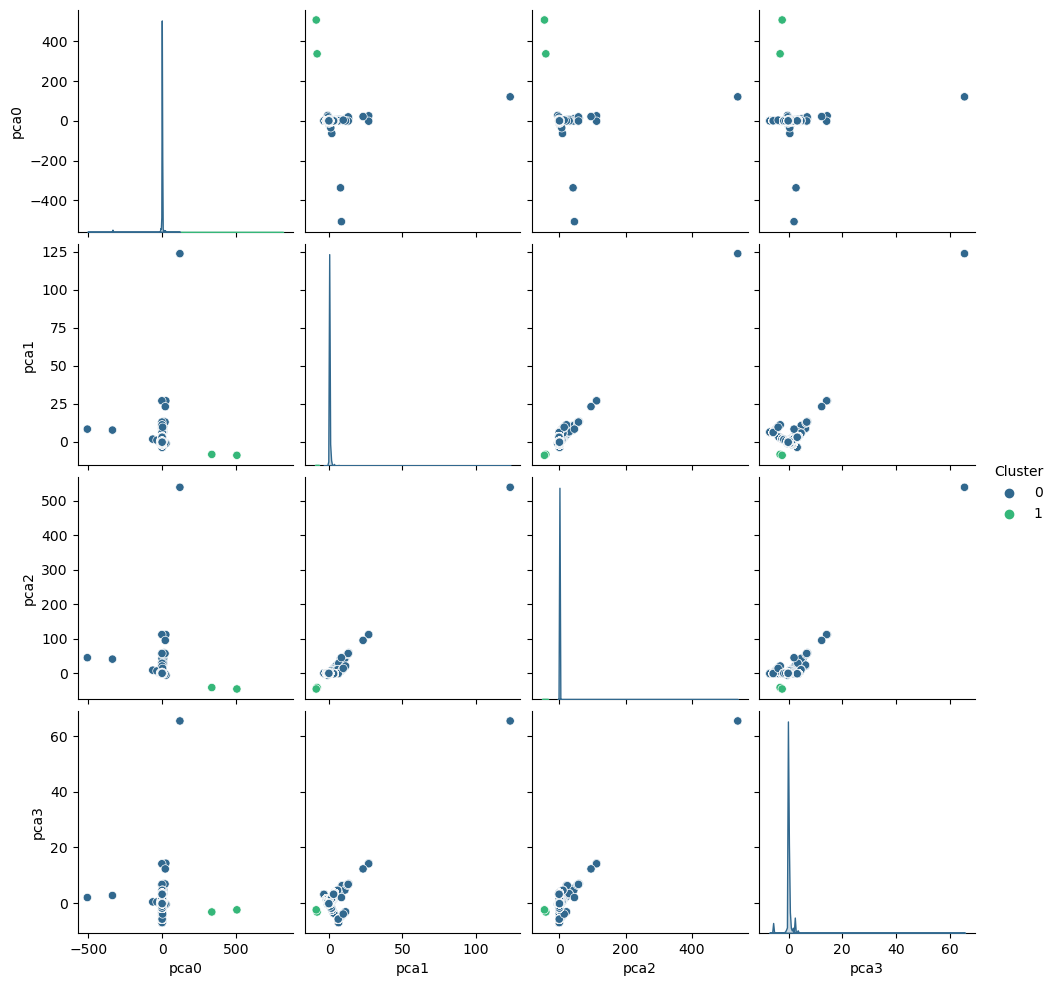

In [43]:
sns.pairplot(pca_df, hue='Cluster', palette='viridis')

<Axes: xlabel='Cluster', ylabel='count'>

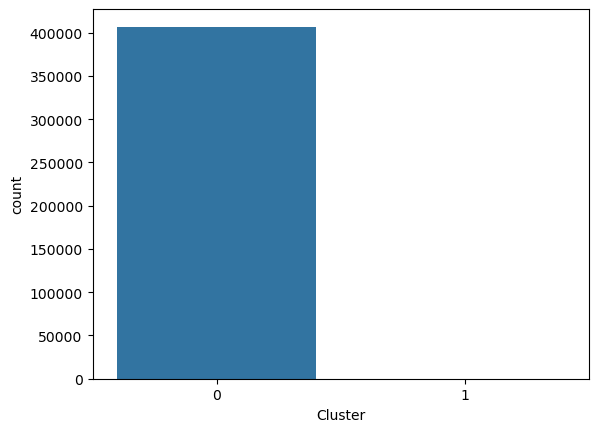

In [44]:
sns.countplot(pca_df, x='Cluster')

# Evaluation
Evaluate the quality of the clustering results using appropriate metrics such as silhouette score or within-cluster sum of squares (WCSS).

Assess the cohesion and separation of the clusters to determine the effectiveness of the segmentation.

use within-cluster sum of squares (WCSS)

based on last WCSS we choice that 3 cluster are the best number of clusters based on visualization

# Personalization and Recommendations
Based on the identified customer segments, develop personalized marketing strategies and recommendations.

Tailor promotions, product suggestions, or communication channels for each cluster to enhance customer engagement and satisfaction.

with tailor promotions

Identify the clusters in which customers show high average spending and tailor promotions and discounts to appeal to the preferences and behaviors of these high-spending clusters.

with Product Suggestions

Analyze the popular product categories within each cluster and provide targeted product suggestions and recommendations to customers based on the preferences observed in their respective clusters.

with Communication Channels

Understand the preferred communication channels for each cluster. Some clusters might respond better to email promotions, while others may prefer social media or mobile notifications

# Interpretation and Insights
Interpret the results and provide insights about the different customer segments.

Discuss the implications for the e-commerce business, such as targeted marketing, customer retention, or inventory management.

based on insights from my capstone

Targeted Marketing

if a cluster has a high recency of purchase but low average spending, consider campaigns focused on increasing the average basket size

Inventory Management

Ensure that high-demand products within specific clusters are well-stocked, leading to improved customer satisfaction and increased sales.